In [3]:
import pandas as pd
import numpy as np
import pickle

In [6]:
all_folk_albums_dict = pickle.load(open('all_folk_albums.pkl', 'rb'))

In [4]:
bad_urls = pickle.load(open('bad_urls.pkl', 'rb'))

In [5]:
len(bad_urls)

7

In [8]:
for bad in bad_urls:
    print(all_folk_albums_dict[bad])

{'album': 'Helplessness Blues', 'album_id': 45, 'artist': 'Fleet Foxes', 'release_date': 'May 3, 2011', 'score': '88', 'is_folk': 1.0, 'is_folk_rock': 0.0, 'is_indie_folk': 1.0}
{'album': 'Light Upon The Lake', 'album_id': 105, 'artist': 'Whitney', 'release_date': 'June 3, 2016', 'score': '83', 'is_folk': 1.0, 'is_folk_rock': 0.0, 'is_indie_folk': 1.0}
{'album': 'Singing Saw', 'album_id': 106, 'artist': 'Kevin Morby', 'release_date': 'April 15, 2016', 'score': '83', 'is_folk': 1.0, 'is_folk_rock': 1.0, 'is_indie_folk': 0.0}
{'album': 'Dark Bird Is Home', 'album_id': 549, 'artist': 'The Tallest Man On Earth', 'release_date': 'May 12, 2015', 'score': '67', 'is_folk': 1.0, 'is_folk_rock': 0.0, 'is_indie_folk': 0.0}
{'album': 'Ape in Pink Marble', 'album_id': 564, 'artist': 'Devendra Banhart', 'release_date': 'September 23, 2016', 'score': '66', 'is_folk': 1.0, 'is_folk_rock': 0.0, 'is_indie_folk': 1.0}
{'album': 'Golden Sings That Have Been Sung', 'album_id': 576, 'artist': 'Ryley Walker'

In [30]:
folk_songs_df = pd.read_csv('song_lyrics.psv', sep='|', header=None)

In [31]:
folk_songs_df.columns = ['song_id',
                         'album_id', 
                         'artist',
                         'album',
                         'album_href',
                         'song',
                         'track_num',
                         'lyrics', 
                         'song_href',
                         'is_folk',
                         'is_folk_rock',
                         'is_indie_folk']

In [32]:
folk_songs_df.isnull().sum()

song_id            0
album_id           0
artist             0
album              0
album_href         0
song               0
track_num        205
lyrics             4
song_href          0
is_folk            0
is_folk_rock       0
is_indie_folk      0
dtype: int64

In [33]:
folk_songs_df.loc[folk_songs_df['lyrics'].isnull()]

,song_id,album_id,artist,album,album_href,song,track_num,lyrics,song_href,is_folk,is_folk_rock,is_indie_folk
451,451,42,Father John Misty,"I Love You, Honeybear",https://genius.com/albums/Father-John-Misty/I-...,"I Love You, Honeybear [Booklet]",NaN,NaN,https://genius.com/Father-john-misty-i-love-yo...,1.0,0.0,1.0
462,462,43,The War on Drugs,Lost in the Dream,https://genius.com/albums/The-War-on-Drugs/Los...,Lost in the Dream Album Art,NaN,NaN,https://genius.com/The-war-on-drugs-lost-in-th...,1.0,1.0,0.0
731,731,75,Joanna Newsom,Divers,https://genius.com/albums/Joanna-Newsom/Divers/,Divers [Booklet],NaN,NaN,https://genius.com/Joanna-newsom-divers-bookle...,1.0,0.0,0.0
2406,2406,296,Beirut,Gulag Orkestar,https://genius.com/albums/Beirut/Gulag-Orkestar/,Gulag Orkestar Cover Art,NaN,NaN,https://genius.com/Beirut-gulag-orkestar-cover...,1.0,0.0,1.0


In [34]:
def album_art_remover(cell):
    if 'Album Art' in cell:
        return True
    elif 'Tracklist' in cell:
        return True
    elif 'Booklet' in cell:
        return True
    elif '[Credits]' in cell:
        return True
    elif '(Live)' in cell:
        return True
    elif 'Cover Art' in cell:
        return True
    else:
        return False

In [35]:
folk_songs_df['is_album_art'] = folk_songs_df['song'].apply(album_art_remover)

In [36]:
folk_songs_df = folk_songs_df[folk_songs_df['is_album_art'] == False]

In [37]:
folk_songs_df.isnull().sum()

song_id            0
album_id           0
artist             0
album              0
album_href         0
song               0
track_num        193
lyrics             0
song_href          0
is_folk            0
is_folk_rock       0
is_indie_folk      0
is_album_art       0
dtype: int64

In [39]:
folk_songs_df[folk_songs_df['track_num'].isnull()]

,song_id,album_id,artist,album,album_href,song,track_num,lyrics,song_href,is_folk,is_folk_rock,is_indie_folk,is_album_art
161,161,19,Sun Kil Moon,Benji,https://genius.com/albums/Sun-Kil-Moon/Benji/,Truck Driver (live in Leamington Spa),NaN,My uncle died in a fire on his birthday n Redn...,https://genius.com/Sun-kil-moon-truck-driver-l...,1.0,0.0,0.0,False
162,162,19,Sun Kil Moon,Benji,https://genius.com/albums/Sun-Kil-Moon/Benji/,Micheline (live in Aveiro),NaN,Micheline used to come to our house and knock ...,https://genius.com/Sun-kil-moon-micheline-live...,1.0,0.0,0.0,False
299,299,30,Fleet Foxes,Fleet Foxes,https://genius.com/albums/Fleet-Foxes/Fleet-Fo...,Isles,NaN,Everyone stares when you walk in the room n Th...,https://genius.com/Fleet-foxes-isles-lyrics,1.0,0.0,1.0,False
337,337,34,Karen Dalton,In My Own Time,https://genius.com/albums/Karen-Dalton/In-My-O...,Katie Cruel (alternate mix),NaN,When I fist came to town n They call me the ro...,https://genius.com/Karen-dalton-katie-cruel-al...,1.0,0.0,0.0,False
375,375,36,The Byrds,Sweetheart of the Rodeo,https://genius.com/albums/The-Byrds/Sweetheart...,You Don't Miss Your Water (Gram Parsons vocal),NaN,In the beginning you really loved me n But I w...,https://genius.com/The-byrds-you-dont-miss-you...,1.0,1.0,0.0,False
376,376,36,The Byrds,Sweetheart of the Rodeo,https://genius.com/albums/The-Byrds/Sweetheart...,One Hundred Years From Now (rehearsal take 2),NaN,One hundred years from this day will the peopl...,https://genius.com/The-byrds-one-hundred-years...,1.0,1.0,0.0,False
419,419,39,Beth Orton,Central Reservation,https://genius.com/albums/Beth-Orton/Central-R...,I Wish I Never Saw The Sunshine,NaN,Baby do you know what you did today n Baby do ...,https://genius.com/Beth-orton-i-wish-i-never-s...,1.0,0.0,0.0,False
420,420,39,Beth Orton,Central Reservation,https://genius.com/albums/Beth-Orton/Central-R...,Someone's Daughter,NaN,I wanna sit and talk and laugh with you as the...,https://genius.com/Beth-orton-someones-daughte...,1.0,0.0,0.0,False
421,421,39,Beth Orton,Central Reservation,https://genius.com/albums/Beth-Orton/Central-R...,I Love How You Love Me,NaN,I Love How Your Eyes Close Whenever You Kiss M...,https://genius.com/Beth-orton-i-love-how-you-l...,1.0,0.0,0.0,False
422,422,39,Beth Orton,Central Reservation,https://genius.com/albums/Beth-Orton/Central-R...,She Cries Your Name,NaN,Falling from the western selves n To find your...,https://genius.com/Beth-orton-she-cries-your-n...,1.0,0.0,0.0,False


In [41]:
folk_songs_df.fillna(0, inplace=True)

In [42]:
folk_songs_df.isnull().sum()

song_id          0
album_id         0
artist           0
album            0
album_href       0
song             0
track_num        0
lyrics           0
song_href        0
is_folk          0
is_folk_rock     0
is_indie_folk    0
is_album_art     0
dtype: int64

In [46]:
def is_instrumental(cell):
    if '[Instrumental]' in cell:
        return 1
    else:
        return 0
    
folk_songs_df['is_instrumental'] = folk_songs_df['lyrics'].apply(is_instrumental)

folk_songs_df['is_instrumental'].sum()

150

In [49]:
alt_country_album = pickle.load(open('alt_country_album_dict.pkl', 'rb'))

In [51]:
list_of_alt_country = []

for album_id in alt_country_album:
    album = alt_country_album[album_id]['album']
    list_of_alt_country.append(album)

In [53]:
def is_alt_country(cell):
    if cell in list_of_alt_country:
        return 1
    else:
        return 0

folk_songs_df['is_alt_country'] = folk_songs_df['album'].apply(is_alt_country)

In [47]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from nltk.tokenize import PunktSentenceTokenizer
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline
% config InlineBackend.figure_format = 'retina'

In [77]:
def vectorizer(num=1, stop=ENGLISH_STOP_WORDS):
    cv = CountVectorizer(stop_words=stop, ngram_range=(num, num))
    X  = folk_songs_df['lyrics']
    cv.fit(X)
    return cv, X

def plotter(cv, X, albums=['In the Aeroplane Over the Sea'], num_features=25):
    
    features = cv.get_feature_names()
    
    fig, ax = plt.subplots((len(albums) + 4), 1, figsize=(12, 9*(len(albums) + 2)))
    
    # Folk labeled songs
    X       = folk_songs_df['lyrics']
    Xv      = cv.transform(X)
    Xv_sum  = np.sum(Xv.toarray(), axis=0)
    Xv_freq = pd.DataFrame(Xv_sum,
                           index=features,
                           columns=['freq']).sort_values(by='freq', ascending=False)
    
    colors = ['xkcd:indigo', 'xkcd:light violet']
    
    c = [colors[1] if word in Xv_freq.index[:num_features] else colors[0] for word in Xv_freq.index[:num_features]]
    
    ax[0].barh(range(0, 25), Xv_freq['freq'][:num_features], color=c)
    ax[0].set_title('Folk Song word freq')
    ax[0].set_yticks(range(0, 25))
    ax[0].set_yticklabels(Xv_freq.index[:num_features])
    ax[0].invert_yaxis()
    
    # folk_rock labeled songs
    Y       = folk_songs_df.loc[folk_songs_df['is_folk_rock'] == 1]['lyrics']
    Yv      = cv.transform(Y)
    Yv_sum  = np.sum(Yv.toarray(), axis=0)
    Yv_freq = pd.DataFrame(Yv_sum,
                           index=features,
                           columns=['freq']).sort_values(by='freq', ascending=False)
    
    c = [colors[1] if word in Xv_freq.index[:num_features] else colors[0] for word in Yv_freq.index[:num_features]]
    
    ax[1].barh(range(0, 25), Yv_freq['freq'][:num_features], color=c)
    ax[1].set_title('Folk Rock Song word freq')
    ax[1].set_yticks(range(0, 25))
    ax[1].set_yticklabels(Yv_freq.index[:num_features])
    ax[1].invert_yaxis()
    
    # indie folk labeled
    Z       = folk_songs_df.loc[folk_songs_df['is_indie_folk'] == 1]['lyrics']
    Zv      = cv.transform(Z)
    Zv_sum  = np.sum(Zv.toarray(), axis=0)
    Zv_freq = pd.DataFrame(Zv_sum,
                           index=features,
                           columns=['freq']).sort_values(by='freq', ascending=False)
    
    c = [colors[1] if word in Xv_freq.index[:num_features] else colors[0] for word in Zv_freq.index[:num_features]]
    
    ax[2].barh(range(0, 25), Zv_freq['freq'][:num_features], color=c)
    ax[2].set_title('Indie Folk Song word freq')
    ax[2].set_yticks(range(0, 25))
    ax[2].set_yticklabels(Zv_freq.index[:num_features])
    ax[2].invert_yaxis()
    
    # alt country
    W       = folk_songs_df.loc[folk_songs_df['is_alt_country'] == 1]['lyrics']
    Wv      = cv.transform(W)
    Wv_sum  = np.sum(Wv.toarray(), axis=0)
    Wv_freq = pd.DataFrame(Wv_sum,
                           index=features,
                           columns=['freq']).sort_values(by='freq', ascending=False)
    
    c = [colors[1] if word in Xv_freq.index[:num_features] else colors[0] for word in Wv_freq.index[:num_features]]
    
    ax[3].barh(range(0, 25), Wv_freq['freq'][:num_features], color=c)
    ax[3].set_title('Alt country Song word freq')
    ax[3].set_yticks(range(0, 25))
    ax[3].set_yticklabels(Wv_freq.index[:num_features])
    ax[3].invert_yaxis()
    
    ax_counter = 4
    
    # Any Extra Albums Wanted
    for album in albums:
        A       = folk_songs_df.loc[folk_songs_df['album'] == album]['lyrics']
        Av      = cv.transform(A)
        Av_sum  = np.sum(Av.toarray(), axis=0)
        Av_freq = pd.DataFrame(Av_sum,
                               index=features, 
                               columns=['freq']).sort_values(by='freq', ascending=False)
        
        c = [colors[1] if word in Xv_freq.index[:num_features] else colors[0] for word in Av_freq.index[:num_features]]
        
        ax[ax_counter].barh(range(0, 25), Av_freq['freq'][:num_features], color=c)
        ax[ax_counter].set_title(f'{album} Word Freq')
        ax[ax_counter].set_yticks(range(0, 25))
        ax[ax_counter].set_yticklabels(Av_freq.index[:num_features])
        ax[ax_counter].invert_yaxis()
        
        ax_counter = ax_counter + 1
        
def vectorizer_and_plotter(num=1, albums=['In the Aeroplane Over the Sea'], num_features=25, stop=ENGLISH_STOP_WORDS):
    cv, X = vectorizer(num=num, stop=stop)
    plotter(cv=cv, X=X, albums=albums)

In [81]:
folk_songs_df['album'].unique()

array(['I See a Darkness', 'In the Aeroplane Over the Sea',
       'The Hissing of Summer Lawns', 'Blood on the Tracks',
       'Court and Spark', 'Pink Moon', 'Blue', 'After the Gold Rush',
       'Bryter Layter', 'I Never Even Asked for Light',
       'Songs of Leonard Cohen', 'Bon Iver, Bon Iver', 'On The Beach',
       'Five Leaves Left', 'Ys', 'Unhalfbricking', 'Benji',
       'Have One on Me', 'Illinois', 'The Glow Pt. 2', 'Shields',
       'The Bootleg Series Vol. 6: Bob Dylan Live 1964', 'For the Roses',
       'A Crow Looked at Me', 'Veckatimest', 'Fleet Foxes',
       'Songs for a Blue Guitar', 'Red House Painters (Rollercoaster)',
       'In My Own Time', 'Just Another Diamond Day',
       'Sweetheart of the Rodeo', 'Sung Tongs', 'You Are Free',
       'Central Reservation', 'Bunny Gets Paid', 'Chelsea Girl',
       'I Love You, Honeybear', 'Lost in the Dream', 'Muchacho',
       'Helplessness Blues', 'Either/Or', 'Songs from a Room',
       'What We Did on Our Holidays', 'L

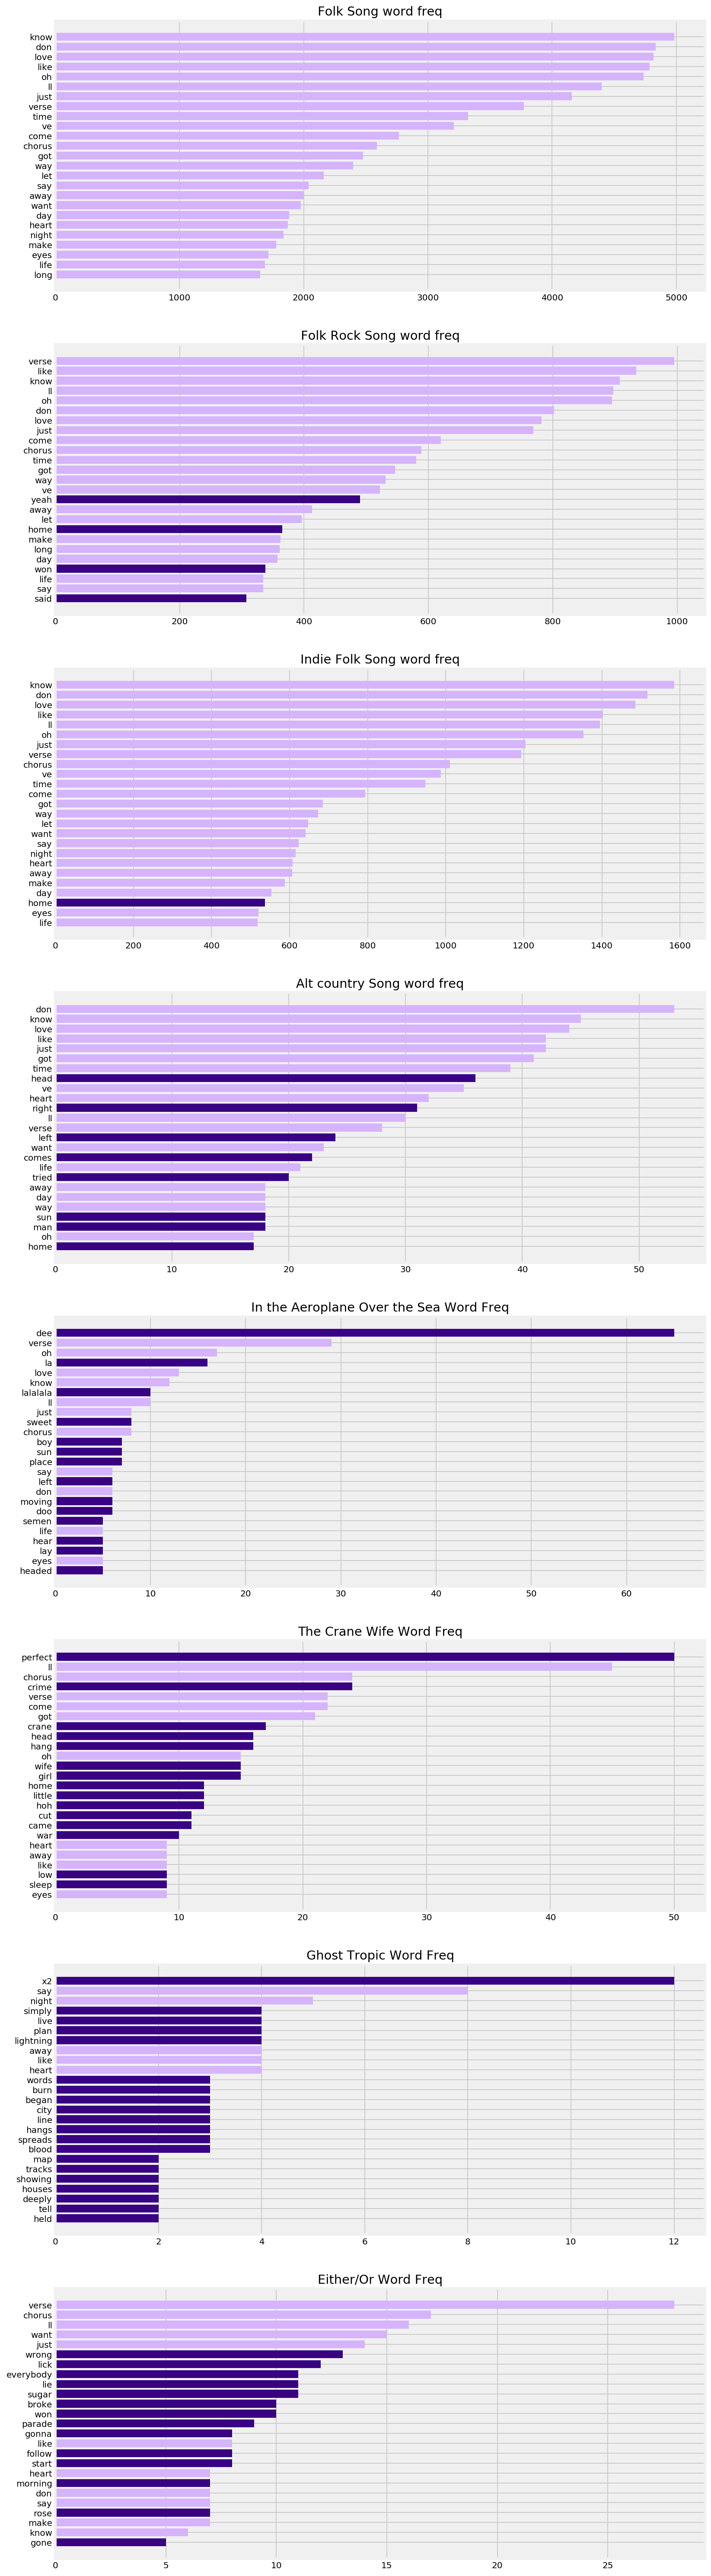

In [82]:
vectorizer_and_plotter(num=1, albums=['In the Aeroplane Over the Sea', 'The Crane Wife', 'Ghost Tropic', 'Either/Or'])

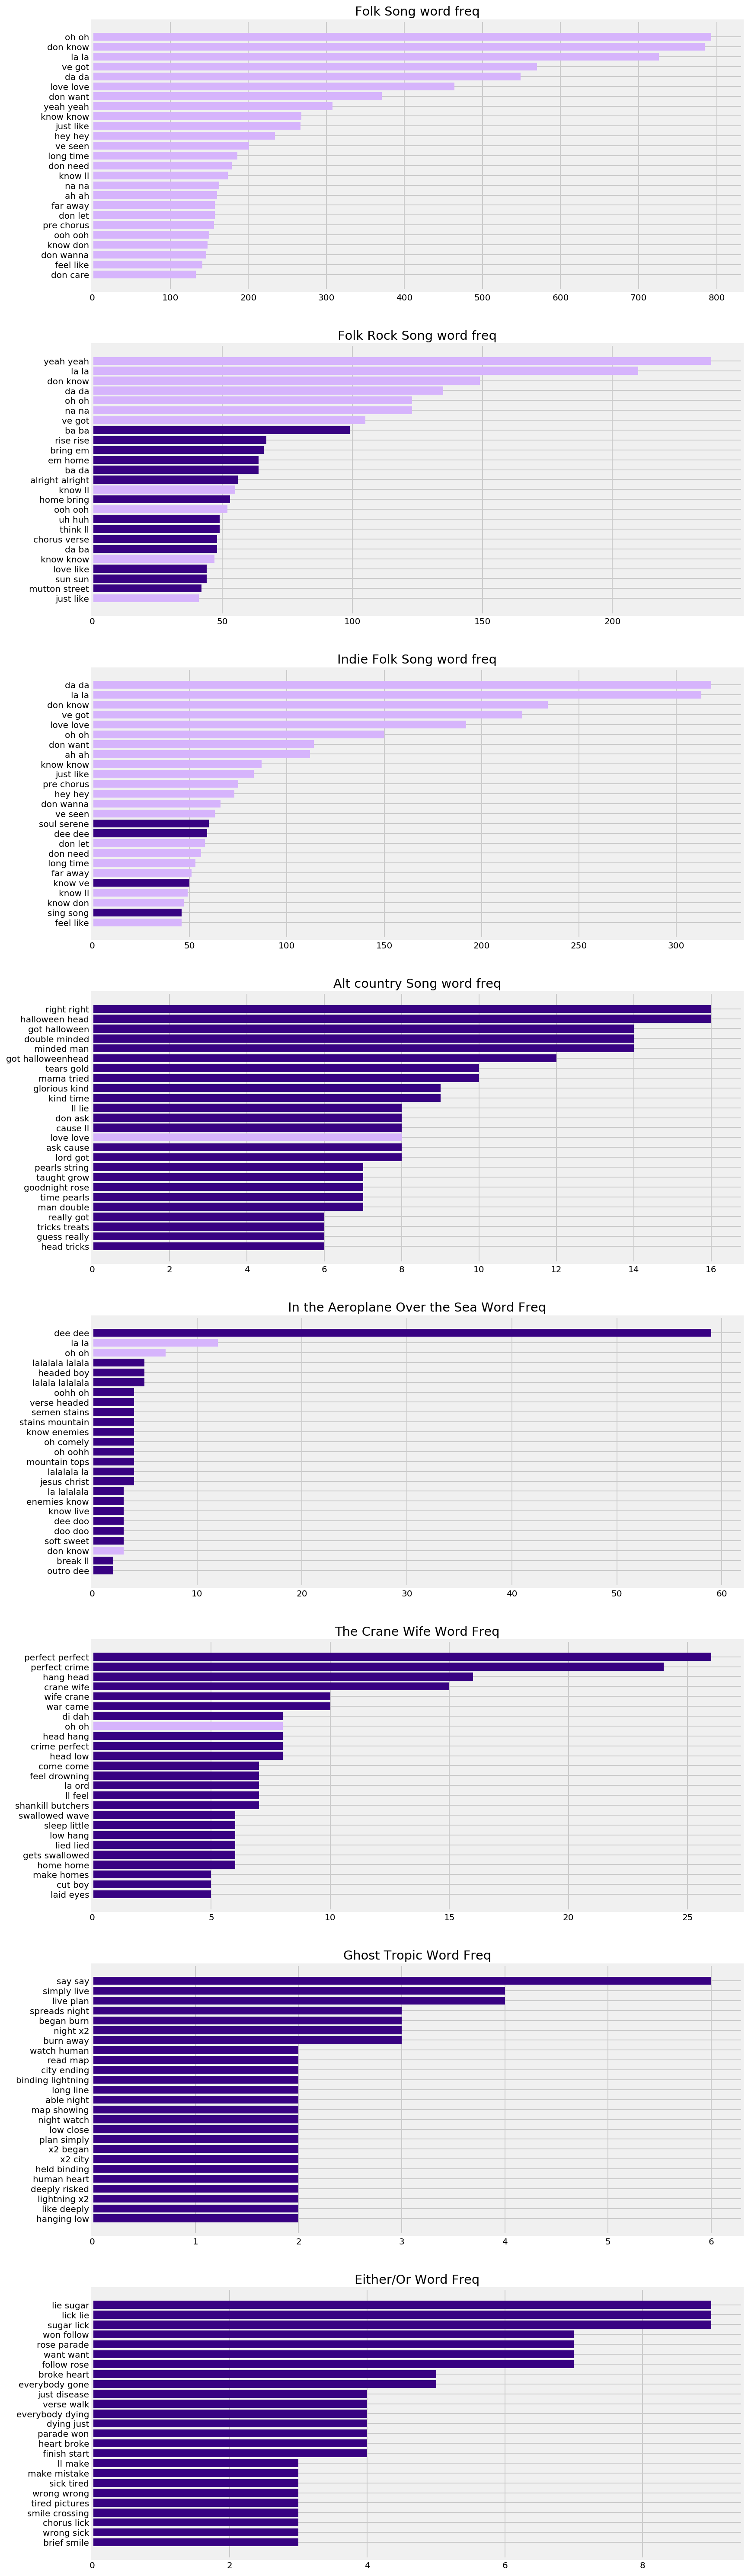

In [83]:
vectorizer_and_plotter(num=2, albums=['In the Aeroplane Over the Sea', 'The Crane Wife', 'Ghost Tropic', 'Either/Or'])

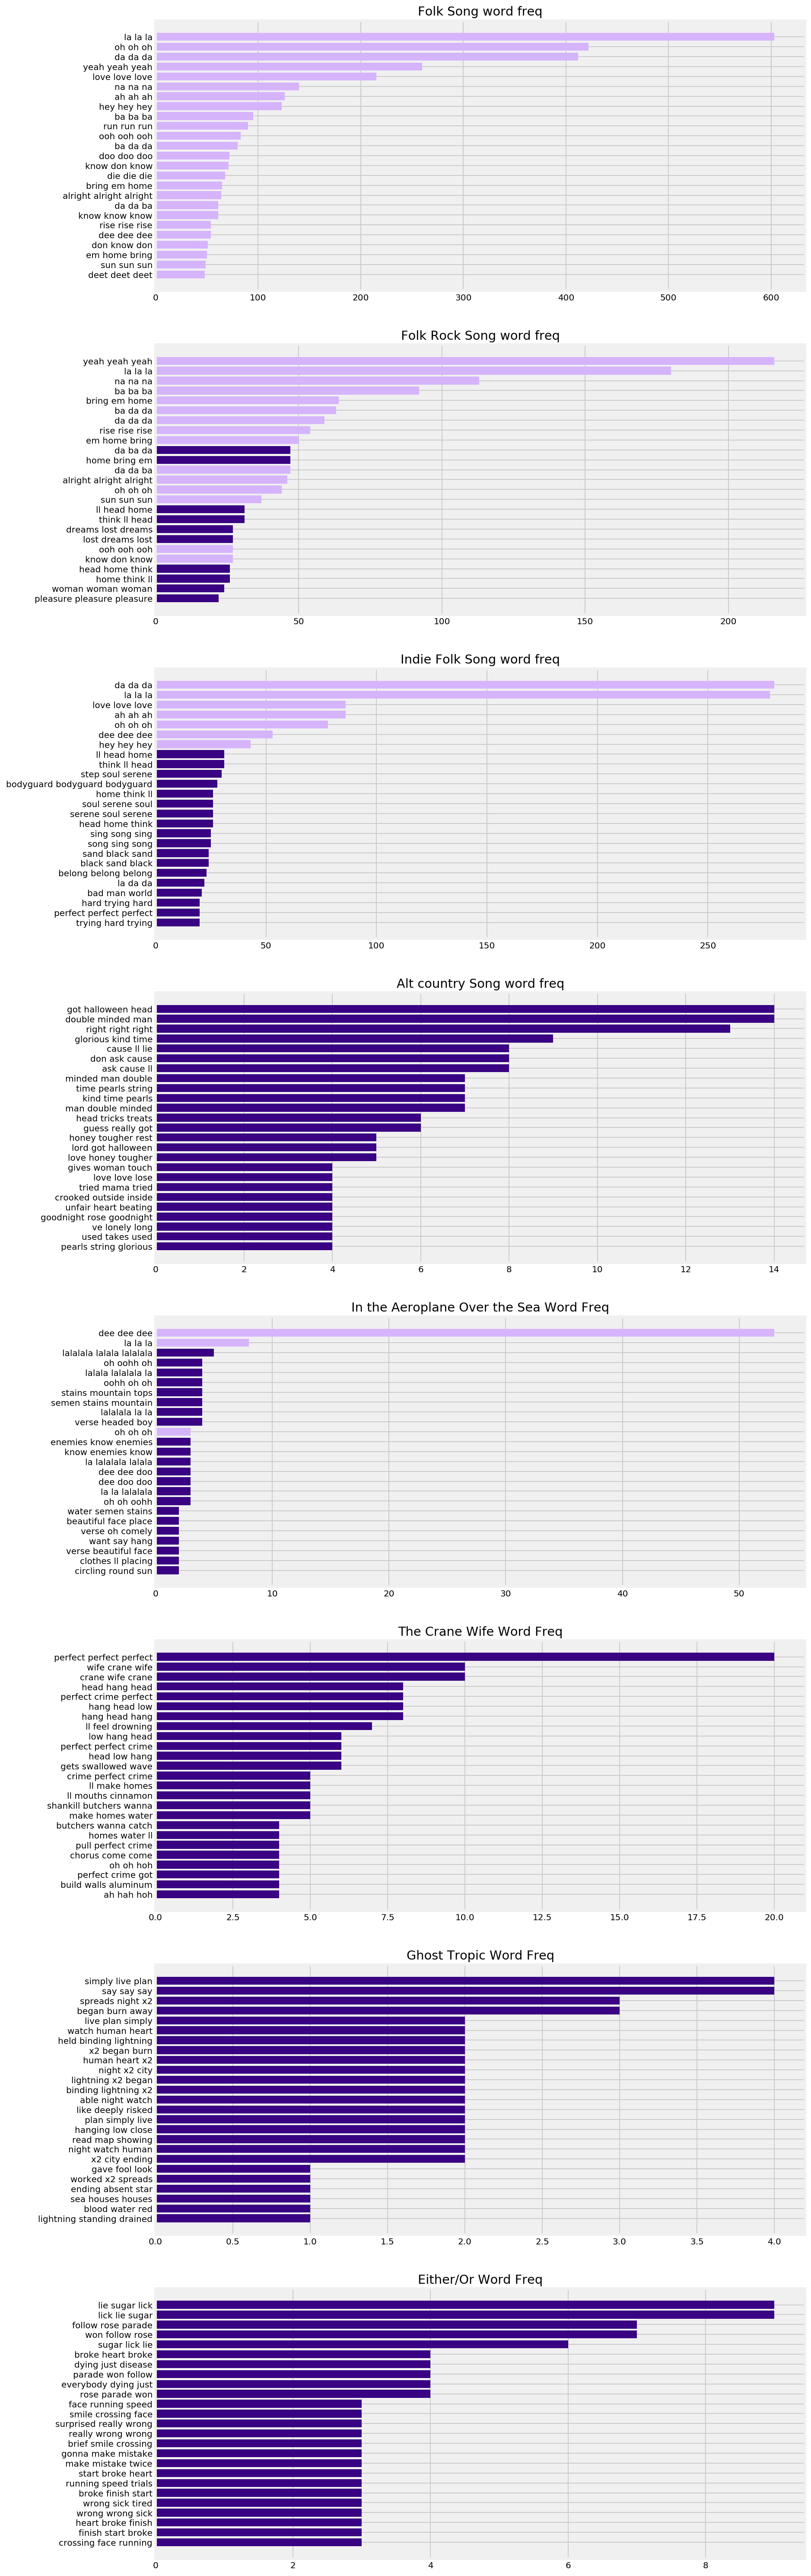

In [84]:
vectorizer_and_plotter(num=3, albums=['In the Aeroplane Over the Sea', 'The Crane Wife', 'Ghost Tropic', 'Either/Or'])